In [3]:
import pandas as pd
import xgboost
import re
import numpy as np

In [4]:
data=pd.read_csv('data_time_reply_1.csv', parse_dates=["thread_timestamp"])

In [5]:
# тут я обираю дані тільки з каналу deep_learning
data=data.loc[data['deep_learning']==1]

In [6]:
# додаю колонки які означають чи використовували в повідомленні якийсь лінк чи звернення до іншого юзера
data.insert(loc=6, column='is_USER', value=data['text'].apply(lambda x: 0 if not re.findall(r'USER_ID', x) else 1))
data.insert(loc=7, column='is_LINK', value=data['text'].apply(lambda x: 0 if not re.findall(r'LINK', x) else 1))

data.head()

,Unnamed: 0,Unnamed: 0.1,thread_id,thread_dayofweek,thread_hour,thread_timestamp,is_USER,is_LINK,text,time_deltas,...,proj_kaggle_fish,proj_kaggle_quora_qs,proj_yt8m,recommender_systems,reinforcement_learnin,satellite_imaging,theory_and_practice,trading,visualization,welcome
1,5525,5525,10840734700,2,17,2016-06-08 17:09:07,1,0,USER_ID: история CNN для распознавания лиц in...,63271,...,0,0,0,0,0,0,0,0,0,0
52,5526,5526,12791606000,4,12,2017-01-20 12:14:20,1,0,USER_ID так у тебя в этом проект заключается? ))),56,...,0,0,0,0,0,0,0,0,0,0
53,5527,5527,12791642000,4,12,2017-01-20 12:20:20,0,0,у меня знакомый в новой зеландии датасаентисн ...,100,...,0,0,0,0,0,0,0,0,0,0
57,5528,5528,12791756100,4,12,2017-01-20 12:39:21,0,0,"Мне кажется, что детектирование течки у коров ...",159,...,0,0,0,0,0,0,0,0,0,0
191,5529,5529,12802982600,5,19,2017-01-21 19:50:26,0,0,"данные - карта, побитая на мелкие квадраты, и ...",665,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# додаємо нову колонку, що позначає як давно відповідали на попереднє повідомлення
def thread_time_diff(channel, data):
    channel_data = data.ix[data['channel'] == channel][1:]
    
    time_main = pd.to_datetime(data[data['channel'] == channel]['thread_timestamp'][1:])
    time_shifted = pd.to_datetime(data[data['channel'] == channel]['thread_timestamp'].shift()[1:])
    time_diff = time_main - time_shifted
    channel_data.insert(loc=5, column='time_diff', value=time_diff.dt.seconds)
    
    return channel_data

In [8]:
data=thread_time_diff('deep_learning',data)

/Users/mefkov/miniconda3/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  app.launch_new_instance()


In [9]:
data

,Unnamed: 0,Unnamed: 0.1,thread_id,thread_dayofweek,thread_hour,time_diff,thread_timestamp,is_USER,is_LINK,text,...,proj_kaggle_fish,proj_kaggle_quora_qs,proj_yt8m,recommender_systems,reinforcement_learnin,satellite_imaging,theory_and_practice,trading,visualization,welcome
52,5526,5526,12791606000,4,12,68713,2017-01-20 12:14:20,1,0,USER_ID так у тебя в этом проект заключается? ))),...,0,0,0,0,0,0,0,0,0,0
53,5527,5527,12791642000,4,12,360,2017-01-20 12:20:20,0,0,у меня знакомый в новой зеландии датасаентисн ...,...,0,0,0,0,0,0,0,0,0,0
57,5528,5528,12791756100,4,12,1141,2017-01-20 12:39:21,0,0,"Мне кажется, что детектирование течки у коров ...",...,0,0,0,0,0,0,0,0,0,0
191,5529,5529,12802982600,5,19,25865,2017-01-21 19:50:26,0,0,"данные - карта, побитая на мелкие квадраты, и ...",...,0,0,0,0,0,0,0,0,0,0
197,5530,5530,12803145300,5,20,1627,2017-01-21 20:17:33,0,0,"Ох. Как ужасно, когда треды используют чтобы о...",...,0,0,0,0,0,0,0,0,0,0
212,5531,5531,12803377700,5,20,2324,2017-01-21 20:56:17,0,0,Домашки - необходимая часть,...,0,0,0,0,0,0,0,0,0,0
213,5532,5532,12803415300,5,21,376,2017-01-21 21:02:33,0,0,"Да, он самый",...,0,0,0,0,0,0,0,0,0,0
218,5533,5533,12804139600,5,23,7243,2017-01-21 23:03:16,0,0,Что-то он частенько из белых негров делает,...,0,0,0,0,0,0,0,0,0,0
221,5534,5534,12804761500,6,0,6219,2017-01-22 00:46:55,0,0,Какая-нибудь вот такая фигня. Я ее в Ultrasoun...,...,0,0,0,0,0,0,0,0,0,0
237,5535,5535,12808799400,6,11,40379,2017-01-22 11:59:54,0,0,кароч одно наблюдение про ганы может кому приг...,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# вручну ділю датасет на трейн і тест 
data_test=data.loc[data['thread_timestamp']>'2017-06-15']

In [11]:
data_train=data.loc[data['thread_timestamp']<='2017-06-15']
print(len(data_train))
print(len(data_test))

495
178


In [12]:
# формую features matrix  для трейн данних, вектор Y у хвилинах
from sklearn.feature_extraction.text import CountVectorizer
#create CountVectorizer object
cv = CountVectorizer(
                    analyzer='word', # token = word
                    ngram_range=(1,1), # only unigrams are used, (1,2) - unigrams/bigrams, ..., etc.
                    #stop_words=['my', 'stop', 'word', 'list'], # or stop_words='english'
                    vocabulary=None, # or vocabulary=your_own_dictionary
                    max_df=1.0, # don't filter words by their frequency
                    #max_features=1000 # only top-6 words will be used as columns
                    )

transformed_texts_cv = cv.fit_transform(data_train['text'].values.astype('U'))


print('Obtained feature matrix X:')
A_cv=transformed_texts_cv.todense()
print(transformed_texts_cv.todense(), '\n')
# вектор В це довжина кожного повідомлення
B=np.sum(A_cv,axis=1)
data1=data_train[['is_USER','is_LINK','time_diff']]


A_1 = data1.as_matrix()
X_train=np.concatenate((A_1,B),axis=1)


data2=data_train['time_deltas']
y=data2.as_matrix()

y_train=(y/60).round()



Obtained feature matrix X:
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]] 



In [13]:
# формую features matrix  для тест данних


from sklearn.feature_extraction.text import CountVectorizer
# create CountVectorizer object
cv = CountVectorizer(
                    analyzer='word', # token = word
                    ngram_range=(1,1), # only unigrams are used, (1,2) - unigrams/bigrams, ..., etc.
                    #stop_words=['my', 'stop', 'word', 'list'], # or stop_words='english'
                    vocabulary=None, # or vocabulary=your_own_dictionary
                    max_df=1.0, # don't filter words by their frequency
                    #max_features=1000 # only top-6 words will be used as columns
                    )

transformed_texts_cv = cv.fit_transform(data_test['text'].values.astype('U'))


print('Obtained feature matrix X:')
A_cv=transformed_texts_cv.todense()
print(transformed_texts_cv.todense(), '\n')
B=np.sum(A_cv,axis=1)
#data1=data_test[['thread_dayofweek','thread_hour','is_USER','is_LINK','time_diff']]
data1=data_test[['is_USER','is_LINK','time_diff']]



A_1 = data1.as_matrix()
X_test=np.concatenate((A_1,B),axis=1)


data2=data_test['time_deltas']
y=data2.as_matrix()

y_test=(y/60).round()




Obtained feature matrix X:
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]] 



In [14]:
# XGBOOST !!!
from numpy import loadtxt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [15]:
print(type(X_train))

<class 'numpy.matrixlib.defmatrix.matrix'>


In [16]:
xgb_train = xgb.DMatrix(X_train, label=y_train)
xgb_val = xgb.DMatrix(X_test, label=y_test)

params = {
    'eta': 0.1, 
    'seed': 42, 
    'subsample': 0.7, 
    'colsample_bytree': 0.7,
    'objective': 'reg:linear', 
    'max_depth': 5, 
    'min_child_weight': 1,
    'eval_metric': 'mae' 
     
}

eval_matrix = [(xgb_val, 'xgb_val')]

final_gb = xgb.train(params, xgb_train, num_boost_round = 1000, evals = eval_matrix, early_stopping_rounds=200,
                    verbose_eval=1)

[0]	xgb_val-mae:81.1215
Will train until xgb_val-mae hasn't improved in 200 rounds.
[1]	xgb_val-mae:82.5825
[2]	xgb_val-mae:84.9074
[3]	xgb_val-mae:88.796
[4]	xgb_val-mae:92.2756
[5]	xgb_val-mae:94.8597
[6]	xgb_val-mae:97.5315
[7]	xgb_val-mae:98.7619
[8]	xgb_val-mae:100.499
[9]	xgb_val-mae:102.373
[10]	xgb_val-mae:104.945
[11]	xgb_val-mae:106.751
[12]	xgb_val-mae:107.941
[13]	xgb_val-mae:109.264
[14]	xgb_val-mae:109.935
[15]	xgb_val-mae:111.11
[16]	xgb_val-mae:112.202
[17]	xgb_val-mae:113.117
[18]	xgb_val-mae:113.404
[19]	xgb_val-mae:114.202
[20]	xgb_val-mae:115.128
[21]	xgb_val-mae:115.47
[22]	xgb_val-mae:116.885
[23]	xgb_val-mae:118.601
[24]	xgb_val-mae:119.314
[25]	xgb_val-mae:120.298
[26]	xgb_val-mae:120.636
[27]	xgb_val-mae:121.004
[28]	xgb_val-mae:120.663
[29]	xgb_val-mae:120.418
[30]	xgb_val-mae:120.846
[31]	xgb_val-mae:121.2
[32]	xgb_val-mae:121.852
[33]	xgb_val-mae:122.459
[34]	xgb_val-mae:122.101
[35]	xgb_val-mae:121.952
[36]	xgb_val-mae:122.361
[37]	xgb_val-mae:122.073
[38]	

In [17]:
#print(model)

In [18]:
dtest = xgb.DMatrix(X_test)
y_xgb = final_gb.predict(dtest) # Predict using our testdmat
#y_pred_ = final_gb.predict(X_test)

In [19]:

import matplotlib.pyplot as plt
er=np.abs(y_test-y_xgb)
#plt.hist(y_test, bins=20)
#plt.hist(y_xgb)
#plt.show()

print(np.mean(er))
print(np.std(er))

140.398835295
203.826948243


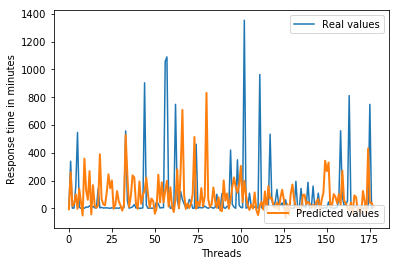

In [20]:

import matplotlib.pyplot as plt

line1, = plt.plot(y_test, label="Real values", linewidth=1.5)
line2, = plt.plot(y_xgb, label="Predicted values", linewidth=2)

# Create a legend for the first line.
first_legend = plt.legend(handles=[line1], loc=1)

# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(first_legend)

# Create another legend for the second line.
plt.legend(handles=[line2], loc=4)

plt.ylabel('Response time in minutes')
plt.xlabel('Threads')

plt.show()

In [21]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, (y_xgb))

140.39883529503695

In [23]:
# LIGHTGBM !!!
import lightgbm

In [24]:
type(np.array(X_train))

numpy.ndarray

In [25]:
import lightgbm as lgb

lgb_train = lgb.Dataset(np.array(X_train), label = y_train)
lgb_val = lgb.Dataset(np.array(X_test), label = y_test, reference = lgb_train)

lgb_params = {
    'learning_rate': 0.1, 
    'seed': 42, 
    'bagging_fraction': 0.7,
    'bagging_freq': 1,
    'feature_fraction': 0.7,
    'application': 'regression', 
    'num_leaves': 55, 
    'min_child_weight': 1,
#    'num_class': 12,
    'metric': 'mae' 
}

eval_matrix = [lgb_val]
eval_name = ['lgb_val']

In [26]:
final_lgb = lgb.train(lgb_params, lgb_train, valid_sets=eval_matrix, valid_names=eval_name,
                      num_boost_round = 1000, 
                      early_stopping_rounds=20,
                      verbose_eval=1
                     )

[1]	lgb_val's l1: 121.176
Train until valid scores didn't improve in 20 rounds.
[2]	lgb_val's l1: 120.67
[3]	lgb_val's l1: 119.996
[4]	lgb_val's l1: 120.658
[5]	lgb_val's l1: 120.2
[6]	lgb_val's l1: 120.497
[7]	lgb_val's l1: 120.497
[8]	lgb_val's l1: 120.378
[9]	lgb_val's l1: 121.474
[10]	lgb_val's l1: 121.209
[11]	lgb_val's l1: 120.922
[12]	lgb_val's l1: 120.221
[13]	lgb_val's l1: 121.451
[14]	lgb_val's l1: 121.832
[15]	lgb_val's l1: 121.609
[16]	lgb_val's l1: 121.992
[17]	lgb_val's l1: 121.314
[18]	lgb_val's l1: 122.093
[19]	lgb_val's l1: 121.667
[20]	lgb_val's l1: 121.465
[21]	lgb_val's l1: 121.247
[22]	lgb_val's l1: 121.549
[23]	lgb_val's l1: 121.308
Early stopping, best iteration is:
[3]	lgb_val's l1: 119.996


In [27]:
ypred = final_lgb.predict(np.array(X_test))

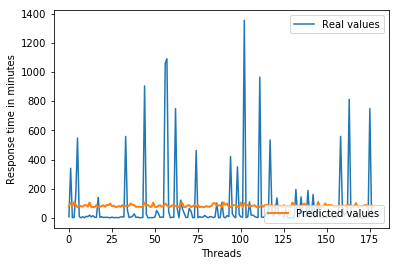

In [33]:
import matplotlib.pyplot as plt

line1, = plt.plot(y_test, label="Real values", linewidth=1.5)
line2, = plt.plot(ypred, label="Predicted values", linewidth=2)

# Create a legend for the first line.
first_legend = plt.legend(handles=[line1], loc=1)

# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(first_legend)

# Create another legend for the second line.
plt.legend(handles=[line2], loc=4)

plt.ylabel('Response time in minutes')
plt.xlabel('Threads')

plt.show()



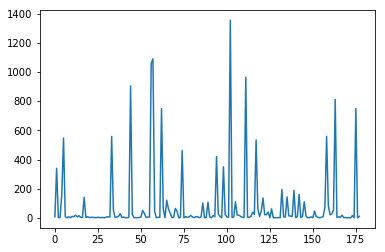

In [29]:
# реальні дані
import pylab
pylab.plot(y_test)
pylab.show()

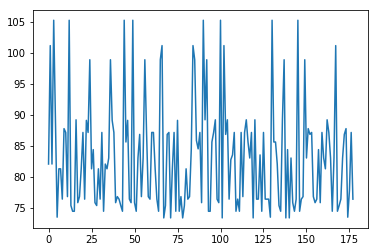

In [30]:
# результати отримані моделлю
import pylab
pylab.plot(ypred)
pylab.show()

In [31]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,ypred)

119.99585395098858